# Notebook Setup

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Dela - Predicting the amount of deaths per year

### 1. Intro
<b>Who is our client?</b><br>
Our client is Dela. Dela is a funeral insurer and caretaker for funeral services. In this semester, they will give us some inside problems that we can investigate on.<br><br>
<b>Project explanation</b><br>
Dela was faced with unprecedented challenge by the fluctuating demands during the Covid19 first year, and that way they are looking to enhance their abilities to react to surprising serge or drops in demands.
We cannot predict when Dela needs to upscale or downscale. However, we can forecast the amount of deaths in the upcoming years. Based on that knowledge and Dela experience, they can conclude themselves when to upscale or downscale.<br><br>
<b>Project goal</b><br>
In our project, we are going to forecast the amount of deaths per year. In this way we can help them conclude easier what to do on higher, lower demand.<br><br><br>
<b>Document explanation</b><br>
In this document there will be the testing and implementation of the project delivered proposal hypothesis. In this document, we will do that by understanding and experimenting with the collected data. After the understanding, we will see if our hypothesis can be validated and we will do that by applying machine learning onto our dataset.<br><br>
<b>Document setup:</b><br>
<table style="font-size: 14px !important; margin: 0 !important">
    <tr>
        <th style="text-align: left;">Data requirements</th>
        <td style="text-align: left;">In this chapter, we are going to setup the requirements for the data that is needed for the prediction. We will answer questions like ‘Which references are trustworthy?’, ‘Do we need some specific features?’, etc…</td>
    </tr>
    <tr>
        <th style="text-align: left;">Data collection</th>
        <td style="text-align: left;">In this chapter, we are going to explain where we found our data, where we are going to store our data and references to he subchapters of each dataset</td>
    </tr>
    <tr>
        <th style="text-align: left;">Data understanding</th>
        <td style="text-align: left;">In this chapter, we are going to understand each specific dataset that we downloaded to really understand the value of each dataset and how it is going to bring a value to Dela.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Data preparation</th>
        <td style="text-align: left;">In this chapter, we are going to prepare our data so it is clean to work with, think about removing all the data that has invalid records, data that has wrong values or data that has similar features with different names.</td>
    </tr>
</table>

### 2. Provisioning

### 2.1 Data Requirements
In this chapter, we are trying to setup the expectations/ requirements of the data we are going to collect for the provisioning fase.

<table style="font-size: 14px !important; margin: 0 !important">
    <tr>
        <th style="text-align: left !important">Data Domain</th>
        <td style="text-align: left !important"></td>
    </tr>
    <tr>
        <th style="text-align: left !important">Data type</th>
        <td style="text-align: left !important"></td>
    </tr>
    <tr>
        <th style="text-align: left !important">Target Variable</th>
        <td style="text-align: left !important"></td>
    </tr>
    <tr>
        <th style="text-align: left !important">Expected Features</th>
        <td style="text-align: left !important"></td>
    </tr>
</table>

### 2.2 Data Collection
Because we want to search for data that contains the amount of deaths in the Netherlands, we began searching for an open data bank that is governmental. In this case the data is from a trustworthy source and will higher the chance of a good prediction. That's when we landed on CBS (stands for `Centraal Bureau voor de Statistiek`, translated to English that means  `Central Station of Statistics`). 

<table style="font-size: 14px !important; margin: 0 !important">
    <tr>
        <th style="text-align: left !important">Data Source</th>
        <td style="text-align: left !important">We got our data from the official   <a href="https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS" target="_blank">CBS</a> Website</td>
    </tr>
    <tr>
        <th style="text-align: left !important">Data Storage</th>
        <td style="text-align: left !important">We stored all of our datasets on <a href="https://github.com/i454038/AI-car-price-prediction" target="_blank">Github</a>, so it is globally accessible</td>
    </tr>
</table>

Load in the datasets from Github

In [82]:
# these are custom classes made to keep the notebook neat.
from classes.dataImporting import datasetManager

datasets = datasetManager.defineDatasets()
dataframes = datasetManager.loadDatasets(datasets)

### 2.3 Data Understanding

understand this data

### 2.4 Data Preperation

### LifeExpectency - LifeExpectencyPerRegion

In [83]:
dataframes['lifeExpectency']['lifeExpectencyPerRegion'].head()

,id,Gemeente,Groep_rij,Geslacht,Bij geboorte,Bij geboorte (afwijking tov NL),Bij 65 jaar,Bij 65 jaar (afwijking tov NL)
0,518,'s-Gravenhage,Levensverwachting,Totaal,"80,8","onder, 99% zeker","19,1","onder, 99% zeker"
1,796,'s-Hertogenbosch,Levensverwachting,Totaal,"81,3","onder, 99% zeker","19,7","onder, 99% zeker"
2,1680,Aa en Hunze,Levensverwachting,Totaal,"82,1",geen,"20,4",geen
3,358,Aalsmeer,Levensverwachting,Totaal,"82,9","boven, 99% zeker","20,1",geen
4,197,Aalten,Levensverwachting,Totaal,"82,1",geen,"20,3",geen


### PopulationChange - Pop2002_2020

In [84]:
# transform dataset to align with others
dataframes['populationChange']['pop2002_2020'] = (
    dataframes['populationChange']['pop2002_2020']
        .rename(columns={'RegioS': 'Gemeente', 'Perioden': 'Year'})
        .assign(Year = lambda x: pd.to_datetime(x.Year.str[:4]).dt.year)
        .assign(Gemeente = lambda x: x.Gemeente.replace(datasetManager.mapFeature('Gemeente')))
#         .groupby(['Year', 'Gemeente', 'LevendGeborenKinderen_2', 'Overledenen_3']).mean()
#         .iloc[:, 4:4]
#         .reset_index()
)

In [85]:
dataframes['populationChange']['pop2002_2020'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10488 entries, 0 to 10487
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   10488 non-null  int64  
 1   Gemeente                             10488 non-null  object 
 2   Year                                 10488 non-null  int64  
 3   BevolkingAanHetBeginVanDePeriode_1   8056 non-null   float64
 4   LevendGeborenKinderen_2              8055 non-null   float64
 5   Overledenen_3                        8055 non-null   float64
 6   TotaleVestiging_4                    8055 non-null   float64
 7   VestigingVanuitEenAndereGemeente_5   8055 non-null   float64
 8   Immigratie_6                         8055 non-null   float64
 9   TotaalVertrekInclAdmCorrecties_7     8055 non-null   float64
 10  VertrekNaarAndereGemeente_8          8055 non-null   float64
 11  EmigratieInclusiefAdmCorrect

In [86]:
dataset = (
    dataframes['populationChange']['pop2002_2020']
        .merge(dataframes['lifeExpectency']['lifeExpectencyPerRegion'], how='left', on='Gemeente')
        .groupby(['Year', 'Gemeente', 'Bij geboorte']).mean()
        .reset_index()
)

dataset.head(5)

,Year,Gemeente,Bij geboorte,ID,BevolkingAanHetBeginVanDePeriode_1,LevendGeborenKinderen_2,Overledenen_3,TotaleVestiging_4,VestigingVanuitEenAndereGemeente_5,Immigratie_6,TotaalVertrekInclAdmCorrecties_7,VertrekNaarAndereGemeente_8,EmigratieInclusiefAdmCorrecties_9,OverigeCorrecties_10,Bevolkingsgroei_11,BevolkingsgroeiRelatief_12,BevolkingsgroeiSinds1Januari_13,BevolkingsgroeiSinds1JanuariRela_14,BevolkingAanHetEindeVanDePeriode_15,id
0,2002,'s-Hertogenbosch,"81,3",67340,131697.0,1728.0,1119.0,6169.0,5309.0,860.0,5991.0,4965.0,1026.0,17.0,804.0,0.61,804.0,0.61,132501.0,796.0
1,2002,Aa en Hunze,"82,1",14604,25552.0,289.0,251.0,1353.0,1121.0,232.0,1617.0,1498.0,119.0,-21.0,-247.0,-0.97,-247.0,-0.97,25305.0,1680.0
2,2002,Aalsmeer,"82,9",15116,22786.0,263.0,171.0,873.0,716.0,157.0,914.0,753.0,161.0,2.0,53.0,0.23,53.0,0.23,22839.0,358.0
3,2002,Aalten,"82,1",15372,18811.0,236.0,164.0,614.0,452.0,162.0,642.0,577.0,65.0,0.0,44.0,0.23,44.0,0.23,18855.0,197.0
4,2002,Achtkarspelen,"81,4",16140,28045.0,398.0,205.0,789.0,763.0,26.0,916.0,860.0,56.0,-9.0,57.0,0.20,57.0,0.20,28102.0,59.0


<AxesSubplot:>

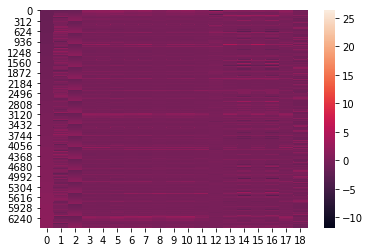

In [87]:
# dataset['Bij geboorte'] = dataset['Bij geboorte'].str.replace(',', '.')
# dataset = dataset.drop(['Gemeente'], axis=1)
# for column in dataset.columns:
#     dataset[column] = round(dataset[column].astype(float))
    
# scaler = StandardScaler()
# dataset = scaler.fit_transform(dataset)    
    
# # dataset
# sns.heatmap(dataset)

### PopulationChange - PopOverview

### PopulationChange - PopComparison2015_2020

### PopulationChange - GrowthPrediction2020_2050

### Death Datasets

### Birth Datasets

<b>Clean Data</b>

- lifeExpectency
    - lifeExpectencyPerRegion2016_2019 
- populationChange
    - pop2002_2020
    - popOverview
    - popComparison2015_2020
    - growthPrediction2020_2050
    - absoluteNr
- death
    - reasons1997_2014
    - reasons2005_2012
    - reasons2013_2020
    - perWeek2020_2021
- birth
    - birthPerYear1899_2018
    - avaragesOfMonth

<b>Merge</b>

In [104]:
# these are custom classes made to keep the notebook neat.



<b>Heatmap</b>